In [13]:
!pip install pyserial pandas matplotlib 1> nul

In [5]:
import serial
import serial.tools.list_ports
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt

# Defining the function that will collect the data.

## Inputs
`duration` - a _pandas_ `Timedelta` object specifying the total time to collect data
`dt` - a _pandas_ `Timedelta` object specifying the time between data points

## Output
A _pandas_ `DataFrame` with a column of timestamps and a column of ozone concentrations (in ppb)

## What it does
1. Search for the attached A-22. It should show up as a COM port that has `USB Serial Device` as part of its description.
2. If a valid COM port is found, attempt to connect to it.
3. Get the current time and calculate the end time by adding `duration` to it.
4. While the current time is less than the end time:
    * Get a reading from the A-22
    * Append the current time and the ozone reading to the appropriate list
    * Sleep until it is time to collect the next data point
5. Transform the lists into a `DataFrame`

In [6]:
def get_ozone_data(duration, dt):
  A22_COM = None
  for port in serial.tools.list_ports.comports():
    if 'USB Serial Device' in port.description:
      A22_COM = port.name
  if A22_COM:
    ser = serial.Serial(A22_COM)
  else:
    print('Failed to detect port')
    return None
  t_list = []
  O3_list = []
  t = pd.Timestamp.now()
  tf = t + duration
  while t < tf:
    data = int(ser.readline())
    t_list.append(t)
    O3_list.append(data)
    sleep(dt.seconds)
    t = pd.Timestamp.now()
  df = pd.DataFrame(data={'Time': t_list, 'O3 (ppb)': O3_list})
  ser.close()
  return df

# Collect the data

Adjust the `duration` and `dt` variables. Then run the cell to gather data. The output is a _pandas_ `DataFrame` object.

In [4]:
duration = pd.Timedelta(1,'minute')
dt = pd.Timedelta(5,'seconds')
df = get_ozone_data(duration, dt)

Connected:  True


# Display the table

In [7]:
df

,Time,O3 (ppb)
0,2022-03-03 13:55:58.918329,0
1,2022-03-03 13:56:04.272050,0
2,2022-03-03 13:56:09.272930,0
3,2022-03-03 13:56:14.273498,0
4,2022-03-03 13:56:19.274052,0
5,2022-03-03 13:56:24.274205,0
6,2022-03-03 13:56:29.274714,0
7,2022-03-03 13:56:34.274856,0
8,2022-03-03 13:56:39.275926,0
9,2022-03-03 13:56:44.277065,0


# Plot the data

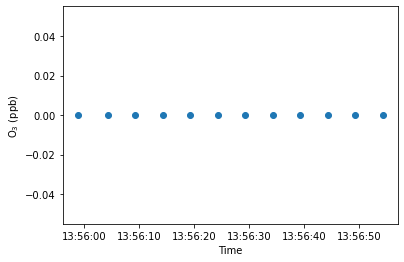

In [9]:
fig, ax = plt.subplots()
ax.plot(df['Time'],df['O3 (ppb)'],'o')
ax.set_xlabel("Time")
ax.set_ylabel(r"$\mathrm{O}_3$ (ppb)");

## Save the plot

In [10]:
fig.savefig('ozone_vs_time.png')

# Save the data

Save the `DataFrame` to a comma-separated-value file.

In [11]:
df.to_csv('ozone_data.csv')